# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 5
label_name = "stat4"
layers = [2]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.4598705172538757
Epoch 1, Loss 1.5396538972854614
Epoch 2, Loss 1.4687566757202148
Epoch 3, Loss 1.4878758192062378
Epoch 4, Loss 1.5100457072257996
Epoch 5, Loss 1.4676051139831543
Epoch 6, Loss 1.5072212219238281
Epoch 7, Loss 1.4901528358459473
Epoch 8, Loss 1.4896557331085205
Epoch 9, Loss 1.468626320362091
Epoch 10, Loss 1.4483211636543274
Epoch 11, Loss 1.4449793100357056
Epoch 12, Loss 1.4659018516540527
Epoch 13, Loss 1.4628115892410278
Epoch 14, Loss 1.4866830706596375
Epoch 15, Loss 1.4259756207466125
Epoch 16, Loss 1.4441052079200745
Epoch 17, Loss 1.4279530048370361
Epoch 18, Loss 1.422019124031067
Epoch 19, Loss 1.4485734105110168
Epoch 20, Loss 1.4572488069534302
Epoch 21, Loss 1.4176943898200989
Epoch 22, Loss 1.4210386872291565
Epoch 23, Loss 1.4213594198226929
Epoch 24, Loss 1.4306068420410156
Epoch 25, Loss 1.414976418018341
Epoch 26, Loss 1.4106215834617615
Epoch 27, Loss 1.4116539359092712
Epoch 28, Loss 1.4222787022590637
Epoch 29, Loss 1.4208198189

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

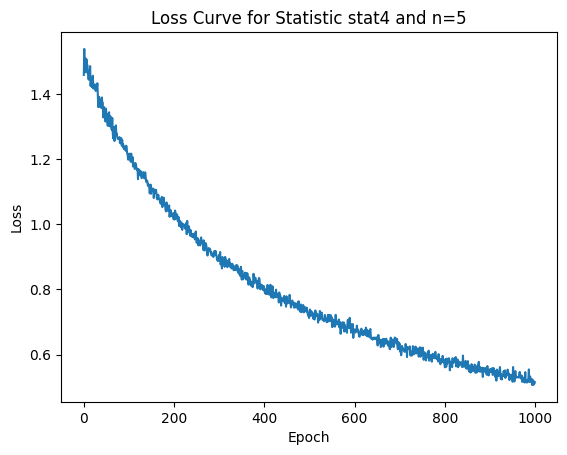

<Figure size 640x480 with 0 Axes>

In [5]:
# Plot loss function
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Loss Curve for Statistic {label_name} and n={n}")
plt.show()
plt.savefig(f"figures/loss_curve_{n}.png")

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

Accuracy for class 0 = 85.71428571428571%
Accuracy for class 1 = 100.0%
Overall accuracy = 91.66666666666667%


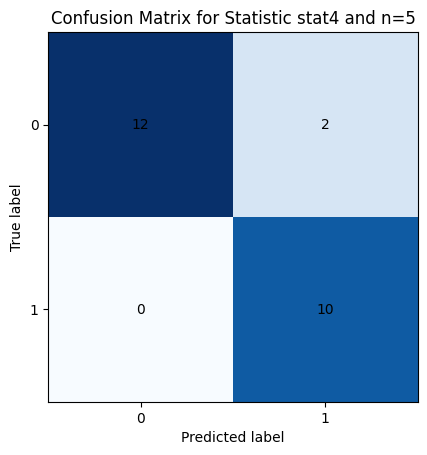

In [6]:
confusion_matrix = evaluate_model(model, test_dataset)
confusion_matrix.print_accuracy()
confusion_matrix.plot(title=f"Confusion Matrix for Statistic {label_name} and n={n}")

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

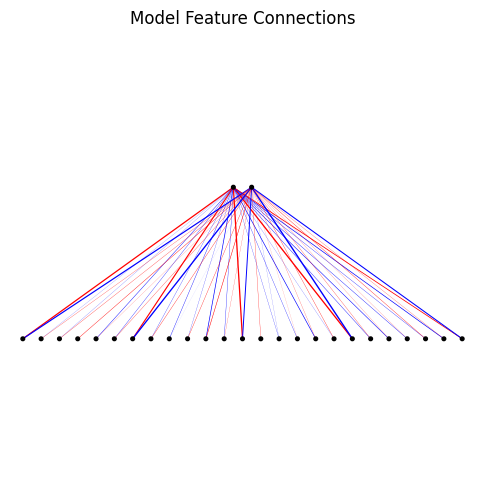

Layer 1


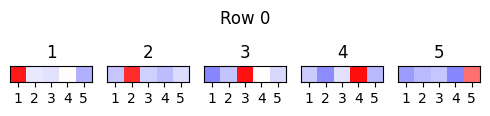

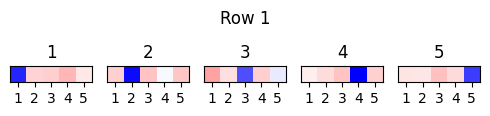

In [7]:
model.plot_connections()

for i in range(len(layers)):
    print(f"Layer {i + 1}")
    for j in range(layers[i]):
        model.plot_heatmap_feature(i, j)